In [66]:
import pandas as pd
import numpy as np

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [67]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url, sep='\t', header=0)

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


4622
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']
Chicken Bowl


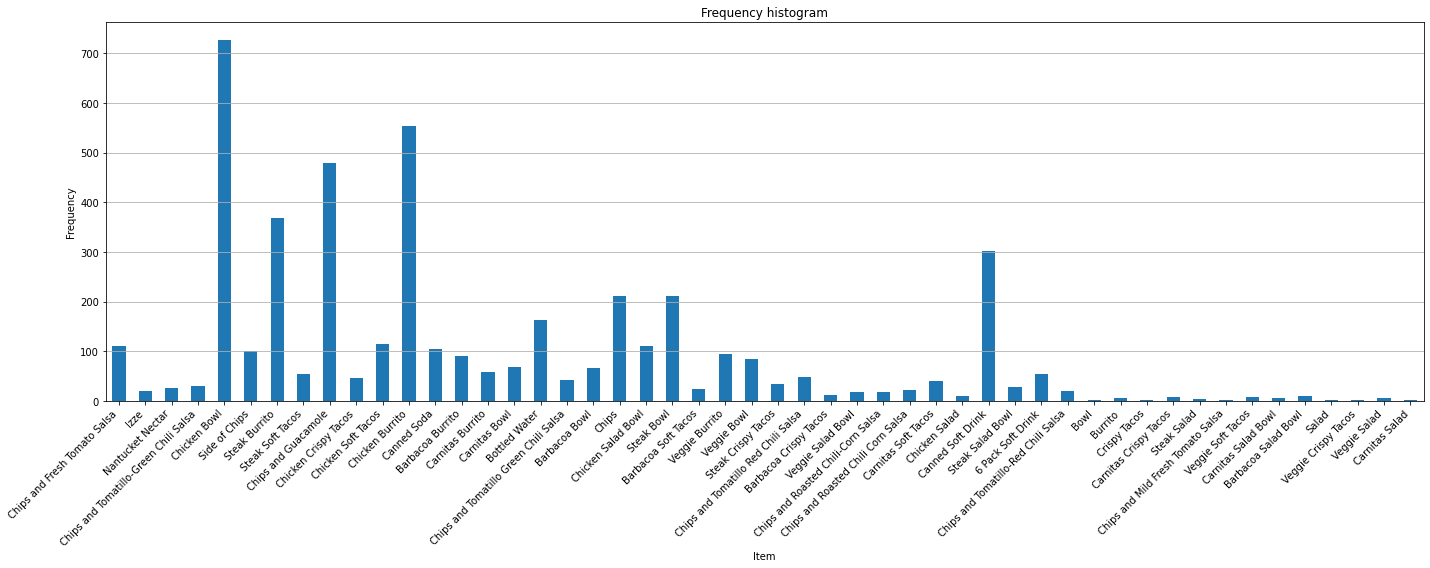

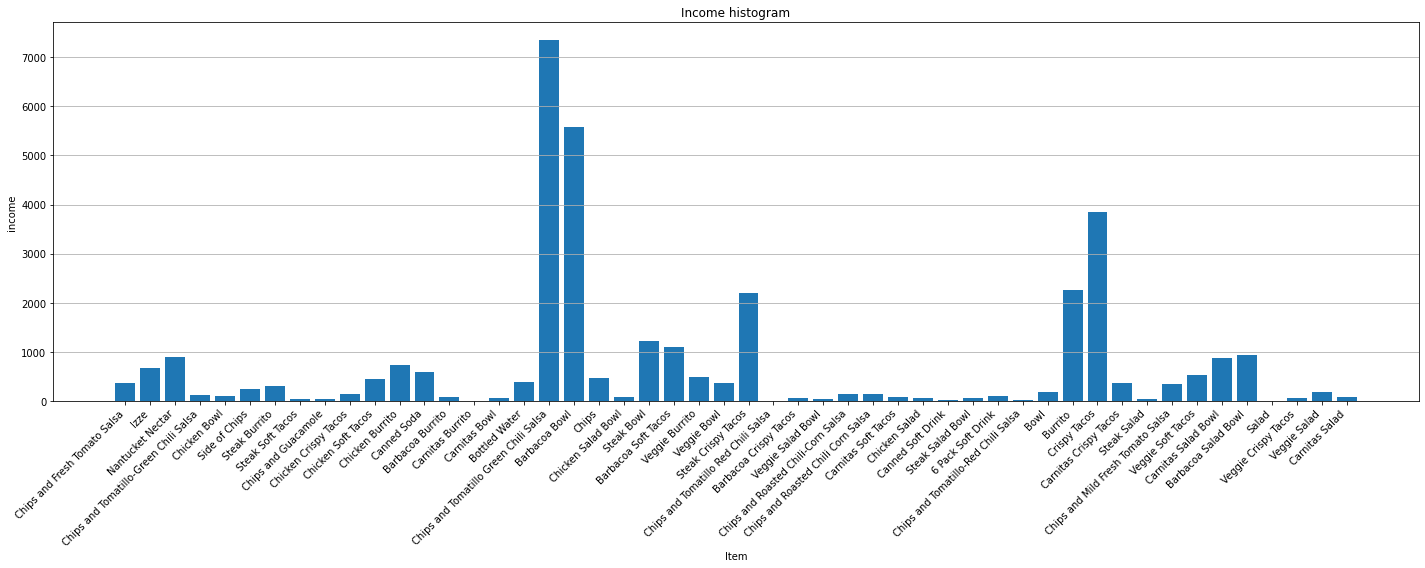

In [68]:
#1
print(len(df))
#2
print(list(df.columns))
#3
print(df['item_name'].mode().tolist()[0])
#4
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 8)


group = df.groupby('item_name', sort=False).order_id.count().reset_index()
group.plot(x='item_name', y='order_id', kind='bar', legend=False)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Frequency histogram')
plt.tight_layout()
plt.show()
#5
df['item_price'] = df['item_price'].apply(lambda x: float(x.replace('$','')) )
#6
plt.xticks(rotation=45, ha="right")
plt.bar(x=df['item_name'].unique(), height=df.groupby('item_name')['item_price'].sum())
plt.grid(axis='y')
plt.xlabel('Item')
plt.ylabel('income')
plt.title('Income histogram')
plt.tight_layout()
plt.show()



In [69]:
#7
print(round(df.groupby('order_id')['item_price'].sum().mean(), 2))
print(round(df['item_price'].sum() / np.sum(df['order_id'].nunique()), 2))


#8
print('order stats:')
print(df.groupby('order_id')['item_name'].nunique().mean())
print(df.groupby('order_id')['item_name'].nunique().min())
print(df.groupby('order_id')['item_name'].nunique().max())
print(df.groupby('order_id')['item_name'].nunique().median())

#9
steaks_df = df.loc[df['item_name'].str.split(' ').str[0] == 'Steak']
df.drop(index = 4509, inplace = True)
print('steaks stats:')
print(steaks_df['item_price'].describe())

print('sause stats:')
mild_steaks_df = steaks_df.loc[steaks_df['choice_description'].str.find('Mild') != -1]
print('steaks with mild sause: ', mild_steaks_df['item_name'].count())

medium_steaks_df = steaks_df.loc[steaks_df['choice_description'].str.find('Medium') != -1]
print('steaks with medium sause: ', medium_steaks_df['item_name'].count())

hot_steaks_df = steaks_df.loc[steaks_df['choice_description'].str.find('Hot') != -1]
print('steaks with hot sause: ', hot_steaks_df['item_name'].count())

18.81
18.81
order stats:
2.340239912758997
1
8
2.0
steaks stats:
count    702.000000
mean      10.518889
std        2.566743
min        8.690000
25%        8.990000
50%        9.250000
75%       11.750000
max       27.750000
Name: item_price, dtype: float64
sause stats:
steaks with mild sause:  105
steaks with medium sause:  114
steaks with hot sause:  82


In [70]:
#10
USD_COURSE = 71
df['item_price_roubles'] = pd.Series(df['item_price'] * USD_COURSE, index=df.index)

In [71]:
#11
print('grouped orders:')
print(df.groupby('order_id').agg({'item_name': lambda x: "; ".join(x), 'item_price':np.sum,'quantity':np.sum}))

grouped orders:
                                                  item_name  item_price  \
order_id                                                                  
1         Chips and Fresh Tomato Salsa; Izze; Nantucket ...       11.56   
2                                              Chicken Bowl       16.98   
3                               Chicken Bowl; Side of Chips       12.67   
4                           Steak Burrito; Steak Soft Tacos       21.00   
5                        Steak Burrito; Chips and Guacamole       13.70   
...                                                     ...         ...   
1830                          Steak Burrito; Veggie Burrito       23.00   
1831                    Carnitas Bowl; Chips; Bottled Water       12.90   
1832                Chicken Soft Tacos; Chips and Guacamole       13.20   
1833                           Steak Burrito; Steak Burrito       23.50   
1834      Chicken Salad Bowl; Chicken Salad Bowl; Chicke...       28.75   

        

In [72]:
print('grouped steakes:')
print(steaks_df.groupby('order_id').agg({'item_name': lambda x: "; ".join(x), 'item_price':np.sum,'quantity':np.sum}))

grouped steakes:
                                item_name  item_price  quantity
order_id                                                       
4         Steak Burrito; Steak Soft Tacos       21.00         2
5                           Steak Burrito        9.25         1
16                          Steak Burrito        8.99         1
20                          Steak Burrito       11.75         1
21                          Steak Burrito        8.99         1
...                                   ...         ...       ...
1810                   Steak Crispy Tacos       11.75         1
1818                     Steak Salad Bowl        9.39         1
1829                        Steak Burrito       11.75         1
1830                        Steak Burrito       11.75         1
1833         Steak Burrito; Steak Burrito       23.50         2

[612 rows x 3 columns]


In [73]:
#12
#Suppore that only chips have 'and'
#Cod below can be uncommented to prove that:

#chips = df.loc[(df['item_name'].str.contains(' and ')) & (df['item_name'].str.contains('Chips'))]
#df_to_check = df.loc[df['item_name'].str.contains(' and ')]
#print(len(df_to_check)==len(chips))

df['per_price_value'] = round(df['item_price']/df['quantity'], 2)
df_per_val = df[['per_price_value','item_name']]
df_per_val = df_per_val.loc[df_per_val['item_name'].str.find(' and ')==-1].drop_duplicates('item_name')

chips_price = df.loc[df['item_name'] == 'Chips']
chips_price = chips_price['item_price'].min()
print(chips_price)

df_chips = df.loc[df['item_name'].str.contains(' and ')]
df_chips = df_chips.drop_duplicates(subset=['item_name'])
#print(df_chips)

for index,row in df_chips.iterrows():
    item = row['item_name'].partition(' and ')[2]
    item_price = round(row['item_price']/row['quantity'] - chips_price, 2)
    df_per_val.append({'item_name': item, 'item_price': item_price},ignore_index=True) 

print(df_per_val.reindex())


2.15
      per_price_value              item_name
1                3.39                   Izze
2                3.39       Nantucket Nectar
4                8.49           Chicken Bowl
6                1.69          Side of Chips
7               11.75          Steak Burrito
8                9.25       Steak Soft Tacos
11               8.75   Chicken Crispy Tacos
12               8.75     Chicken Soft Tacos
16               8.49        Chicken Burrito
18               1.09            Canned Soda
21               8.99       Barbacoa Burrito
27               8.99       Carnitas Burrito
33               8.99          Carnitas Bowl
34               1.09          Bottled Water
39              11.75          Barbacoa Bowl
40               2.15                  Chips
44               8.75     Chicken Salad Bowl
54               8.99             Steak Bowl
56               9.25    Barbacoa Soft Tacos
57              11.25         Veggie Burrito
62              11.25            Veggie Bowl
92   

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [74]:
#minst:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

#f-minst
df_test = pd.read_csv('test.csv', sep=',', header=0)
df_train = pd.read_csv('train.csv', sep=',', header=0)
print(df_test.head())
print(df_train.head())

#coil


(1797, 64)
   Id  Pixel000  Pixel001  Pixel002  Pixel003  Pixel004  Pixel005  Pixel006  \
0   0         0         0         0         0         0         0         0   
1   1         0         0         0         0         0         0         0   
2   2         0         0         0         0         0         0        14   
3   3         0         0         0         0         0         0         0   
4   4         0         0         0         0         0         0         0   

   Pixel007  Pixel008  ...  Pixel774  Pixel775  Pixel776  Pixel777  Pixel778  \
0         9         8  ...       103        87        56         0         0   
1         0         0  ...        34         0         0         0         0   
2        53        99  ...         0         0         0         0        63   
3         0         0  ...       137       126       140         0       133   
4         0         0  ...         0         0         0         0         0   

   Pixel779  Pixel780  Pixel781  